# Analysis of competition results

In [1]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pickle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab as plt
import torch
import matplotlib.pyplot as plt
#!pip install seaborn
import seaborn as sns


import sys
sys.path.append(r"C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\code\RL_project\Hockey_training")
import training

## 0.0 Load a pkl from the competition

In [2]:
# load and check some values of a pkl from one game in the competition

with open('competition_results/rnd_combi.pkl', 'rb') as f:
    data = pickle.load(f)

round = "0"  # 0, 1, 2 or 3

print(data.keys())

print(f"num rounds: {data['num_rounds'][0][0]}")

# we are playing 4 rounds, each having max. 251 actions
print(data["actions"].shape)

# each round has max. 251 actions and 252 observations (or less if goal)
print(len(data[f"actions_round_{round}"]))
print(len(data[f"observations_round_{round}"]))

# each action includes 8 datapoints (do nothing, move, shoot, ...)
# each observation includes 18 datapoints (x pos player one, y pos player one, ...)
print(len(data[f"actions_round_{round}"][0]))
print(len(data[f"observations_round_{round}"][0]))

dict_keys(['actions_round_0', 'observations_round_0', 'actions_round_1', 'observations_round_1', 'actions_round_2', 'observations_round_2', 'actions_round_3', 'observations_round_3', 'num_rounds', 'actions'])
num rounds: 4
(603, 2, 4)
146
147
8
18


## Analysis of player movements


------------------------------- GAME 1/4 -------------------------------



C:\Users\pi030\AppData\Local\Temp\ipykernel_18236\1965090384.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('summer')


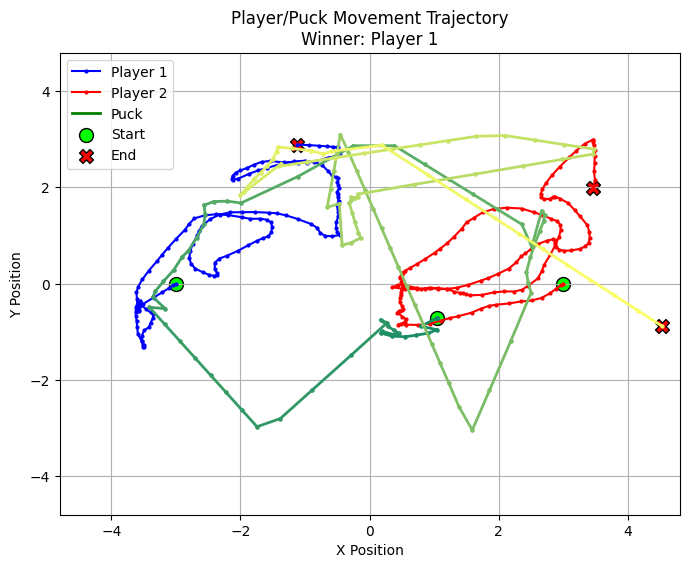

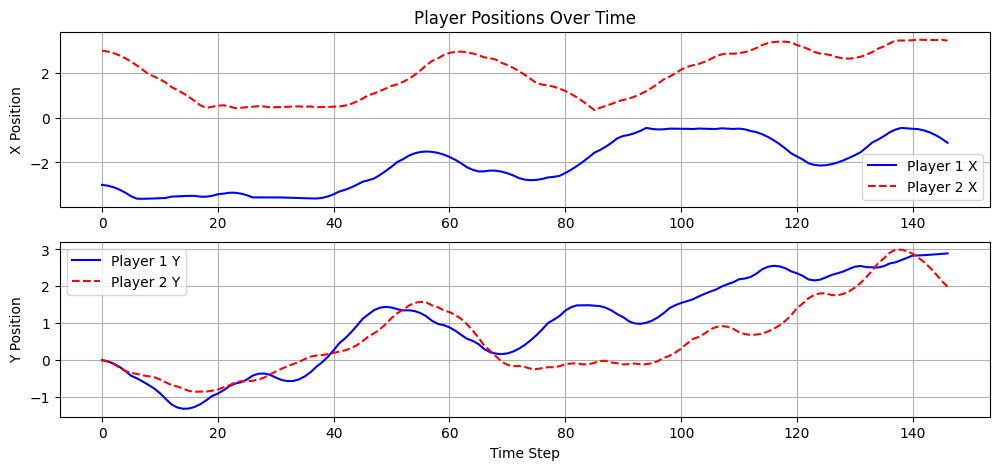

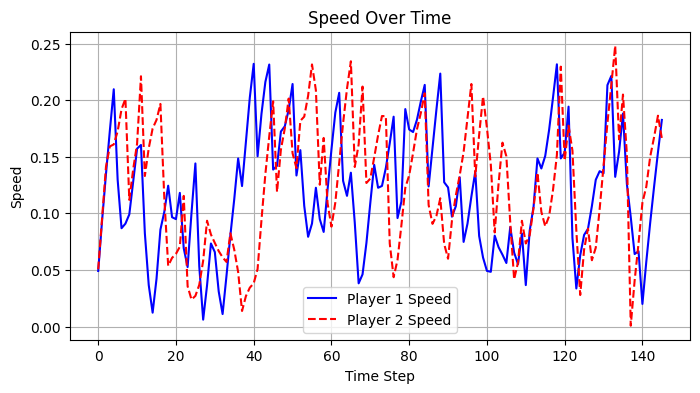


------------------------------- GAME 2/4 -------------------------------



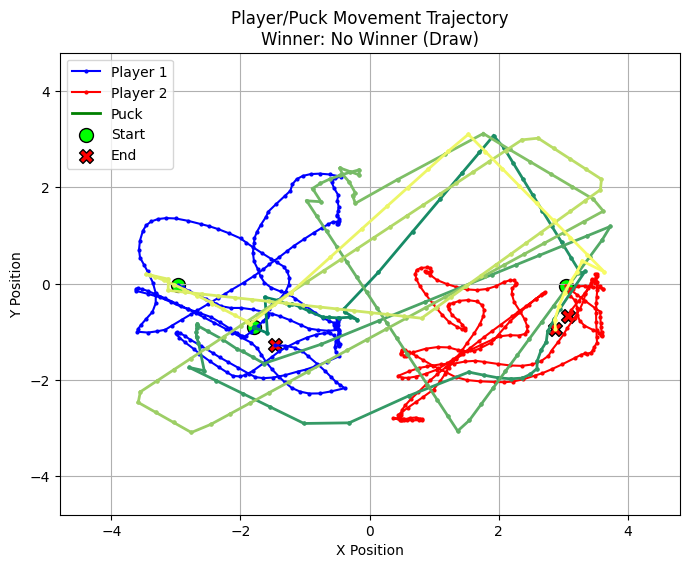

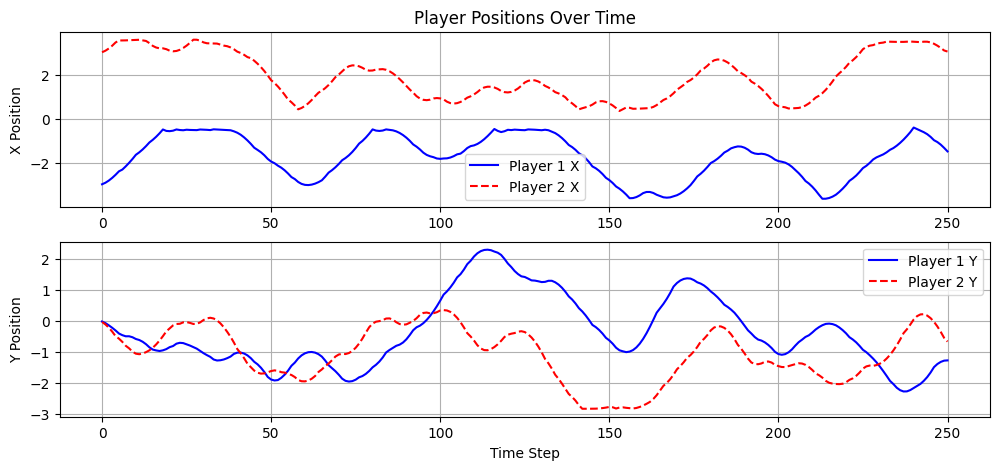

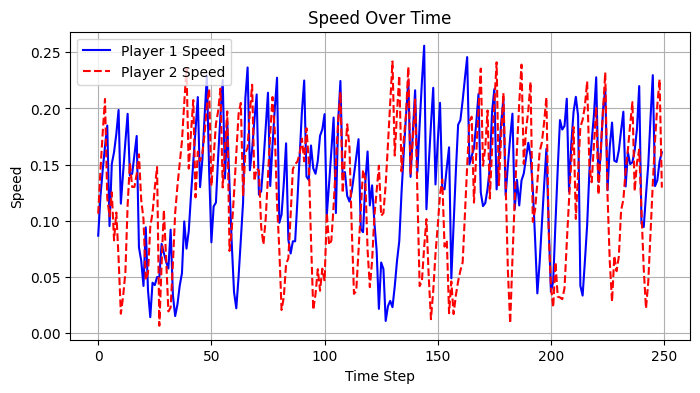


------------------------------- GAME 3/4 -------------------------------



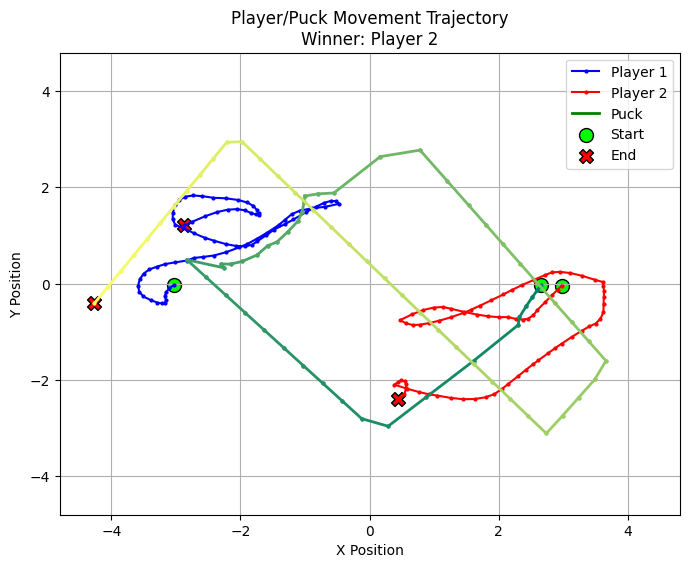

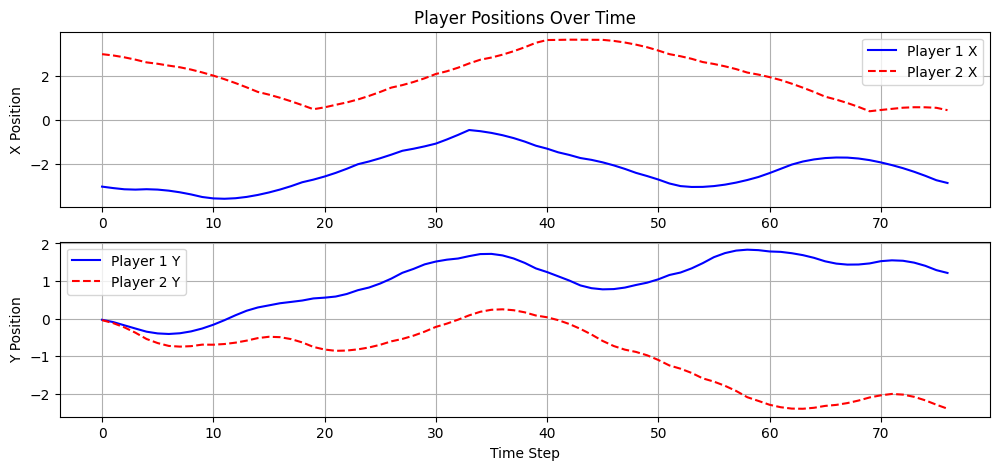

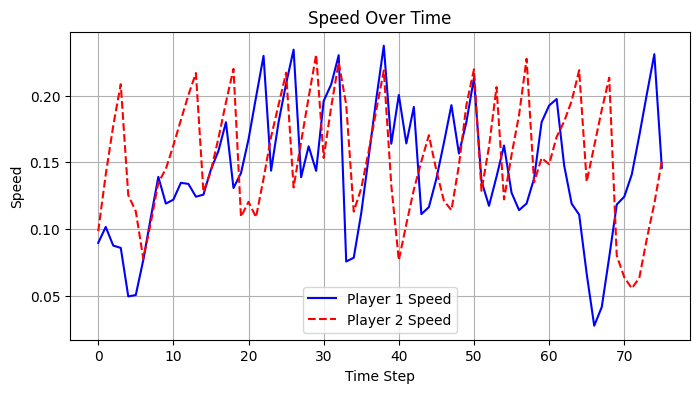


------------------------------- GAME 4/4 -------------------------------



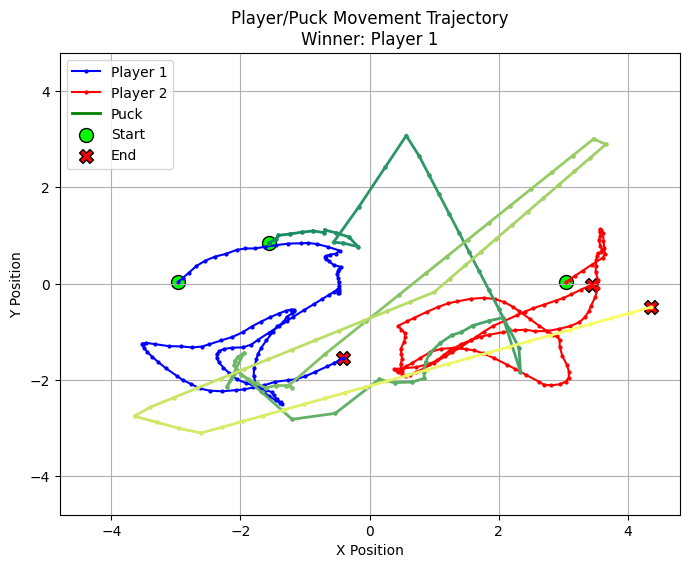

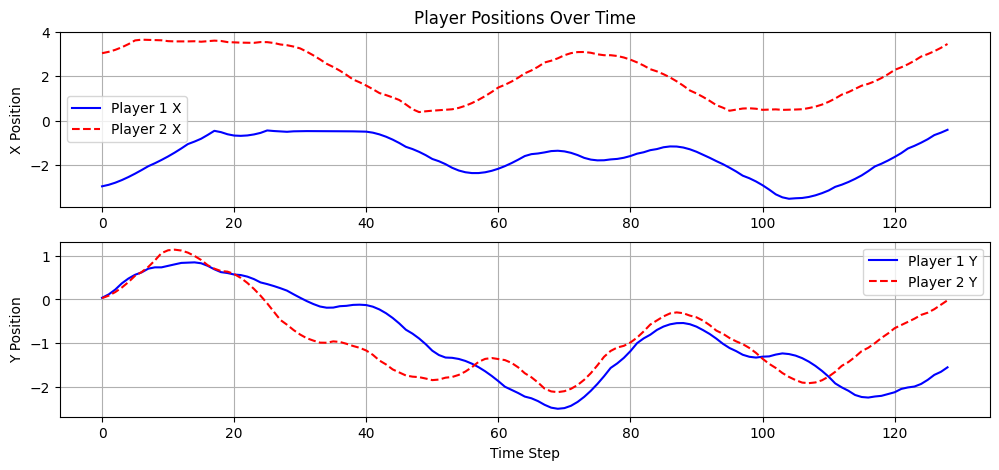

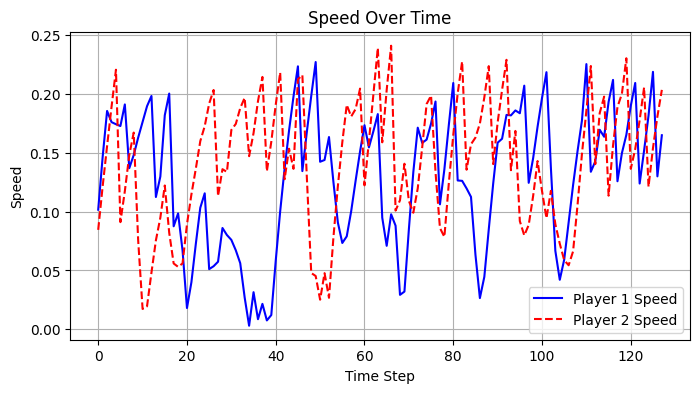

In [3]:

for round in range(4):
    
    print(f"\n------------------------------- GAME {round + 1}/{4} -------------------------------\n")

    # Load observations for this round
    observations = np.array(data[f"observations_round_{str(round)}"])  # Convert to NumPy array

    # Extract player 1 positions
    x_player1 = observations[:, 0]  # X position of player 1
    y_player1 = observations[:, 1]  # Y position of player 1

    # Extract player 2 positions
    x_player2 = observations[:, 6]  # X position of player 2
    y_player2 = observations[:, 7]  # Y position of player 2

    # Extract puck data
    puck_x = observations[:, 12]
    puck_y = observations[:, 13]
    puck_time_p1 = observations[:, 16]
    puck_time_p2 = observations[:, 17]

    # Compute speed for both players
    dx1 = np.diff(x_player1)
    dy1 = np.diff(y_player1)
    speed_player1 = np.sqrt(dx1**2 + dy1**2)

    dx2 = np.diff(x_player2)
    dy2 = np.diff(y_player2)
    speed_player2 = np.sqrt(dx2**2 + dy2**2)

    # Compute speed puck
    dx3 = np.diff(puck_x)
    dy3 = np.diff(puck_y)
    speed_puck = np.sqrt(dx3**2 + dy3**2)
    
    # ---- Detect Goals ----
    goal_p1 = np.any(puck_x > 4)  # Player 1 scores if puck crosses x > 4
    goal_p2 = np.any(puck_x < -4)  # Player 2 scores if puck crosses x < -4

    # ---- Determine Winner ----
    if goal_p1 and not goal_p2:
        winner = 1
    elif goal_p2 and not goal_p1:
        winner = 2
    else:
        winner = 0


    # Create time axis
    time_steps = np.arange(len(x_player1))  # Time steps for plotting

    plt.close()
    # ---- PLOT: Player & Puck Movement Trajectory ----
    plt.figure(figsize=(8, 6))

    # Plot movement paths
    plt.plot(x_player1, y_player1, label="Player 1", color='blue', marker='o', markersize=2 , linestyle='-')
    plt.plot(x_player2, y_player2, label="Player 2", color='red', marker='o', markersize=2, linestyle='-')
    #plt.plot(puck_x, puck_y, label="Puck", color='green', marker='o', markersize=2, linestyle='-')
    # Create a colormap
    cmap = cm.get_cmap('summer')
    # Normalize time steps to [0, 1] range for colormap
    time_steps_normalized = (time_steps - time_steps.min()) / (time_steps.max() - time_steps.min())
    # Plot puck trajectory with gradient color
    for i in range(len(puck_x) - 1):
        plt.plot(puck_x[i:i+2], puck_y[i:i+2], color=cmap(time_steps_normalized[i]), linewidth=2, marker='o', markersize=2, linestyle='-')
    # Add a legend for the puck
    plt.plot([], [], label="Puck", color='green', linestyle='-', linewidth=2)

    # Highlight start positions (Green)
    plt.scatter(x_player1[0], y_player1[0], color='lime', edgecolors='black', s=100, label="Start", marker='o')
    plt.scatter(x_player2[0], y_player2[0], color='lime', edgecolors='black', s=100, marker='o')
    plt.scatter(puck_x[0], puck_y[0], color='lime', edgecolors='black', s=100, marker='o')

    # Highlight end positions (Red)
    plt.scatter(x_player1[-1], y_player1[-1], color='red', edgecolors='black', s=100, label="End", marker='X')
    plt.scatter(x_player2[-1], y_player2[-1], color='red', edgecolors='black', s=100, marker='X')
    plt.scatter(puck_x[-1], puck_y[-1], color='red', edgecolors='black', s=100, marker='X')

    # Labels & Formatting
    plt.xlim(-4.8, 4.8) 
    plt.ylim(-4.8, 4.8)
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.title(f"Player/Puck Movement Trajectory\nWinner: {'No Winner (Draw)' if winner == 0 else f'Player {winner}'}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ---- PLOT 2: X & Y Positions over time ----
    plt.figure(figsize=(12, 5))
    plt.subplot(2, 1, 1)
    plt.plot(time_steps, x_player1, label="Player 1 X", color='blue')
    plt.plot(time_steps, x_player2, label="Player 2 X", color='red', linestyle='dashed')
    plt.ylabel("X Position")
    plt.title("Player Positions Over Time")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(time_steps, y_player1, label="Player 1 Y", color='blue')
    plt.plot(time_steps, y_player2, label="Player 2 Y", color='red', linestyle='dashed')
    plt.xlabel("Time Step")
    plt.ylabel("Y Position")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ---- PLOT 3: Speed over time ----
    plt.figure(figsize=(8, 4))
    plt.plot(time_steps[:-1], speed_player1, label="Player 1 Speed", color='blue')
    plt.plot(time_steps[:-1], speed_player2, label="Player 2 Speed", color='red', linestyle='dashed')
    plt.xlabel("Time Step")
    plt.ylabel("Speed")
    plt.title("Speed Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()
    